In [33]:
import os
os.getcwd()


'C:\\Users\\Inspiron\\Desktop\\projet_inter\\ProjetInterpromo2020g8'

In [34]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [36]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [37]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [38]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

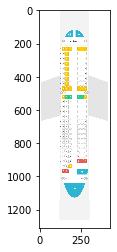

In [39]:
img = plt.imread('C:/Users/Inspiron/Desktop/British_Airways_Airbus_A319_C_plane331.svg.png')
plt.imshow(img)

In [40]:
# recover the pixel size of an image
#img.size
img = Image.open('C:/Users/Inspiron/Desktop/British_Airways_Airbus_A319_C_plane331.svg.png')
(a,b)= img.size
print("a=",a,"b=",b)

a= 425 b= 1310


In [41]:
# recover the rgb of a given pixel
img = Image.open('C:/Users/Inspiron/Desktop/British_Airways_Airbus_A319_C_plane331.svg.png')
coordonee = x, y = 200,100
img.getpixel(coordonee)[:3]

(243, 243, 243)

In [42]:
# input manual version
def get_rgb(image, x, y):
    return image.getpixel((x,y))[:3]

def get_shape(image):
    return image.size

i = Image.open('C:/Users/Inspiron/Desktop/British_Airways_Airbus_A319_C_plane331.svg.png')
x, y = 200,100
rgb_code = get_rgb(i, x, y)
rgb_code

(243, 243, 243)

## 
Test des pixels suivant avec boucle

In [43]:
# recover neighbors of a given pixel its coordinates with a neighbor step-distance
def x_y_neighboors(image, x, y, step=2):
    rgb_neighboors_val = []
    (a, b) = get_shape(image)
    for x_ in range (x-step, x+1+step):
        if x_ >= 0 and x_ < a:
            for y_ in range (y-step, y+1+step):
                if  y_>= 0 and y_ < b:
                    rgb_neighboors_val.append([x_, y_, get_rgb(image, x_, y_)])
                
    return rgb_neighboors_val
x, y = 0,0
x_y_neighboors(img, x, y, step=1)
###########################


[[0, 0, (0, 0, 0)], [0, 1, (0, 0, 0)], [1, 0, (0, 0, 0)], [1, 1, (0, 0, 0)]]

In [44]:
def count_nb_same_pixel(image, x, y, rgb_neighboors):
    pixel_ref = get_rgb(image, x, y)
    count : int = 0
    for rgb_n in rgb_neighboors:
        if rgb_n[2] == pixel_ref:
            count +=  1
        
    return count / len(rgb_neighboors), pixel_ref
    

x, y = 200,110
rgb_neighboors = x_y_neighboors(img, x, y, step=1)
count_nb_same_pixel(img, x, y, rgb_neighboors)

(1.0, (243, 243, 243))

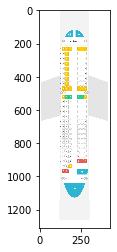

In [13]:
plt.imshow(img, cmap='gray')

In [45]:
# recupere neighbors for each pixel
def neighboors_Frequency(image, step):
    rgb_neighboors_val = []
    (a, b) = get_shape(image)
    
    res = {}
    for x_ in range (0,5):
        for y_ in range (0,5):
            rgb_neighboors = x_y_neighboors(image, x_, y_, step=step)
            count_ = count_nb_same_pixel(img, x, y, rgb_neighboors)
            res[(x_,y_)] = count_
    return res
    

        

print(neighboors_Frequency(img, step=3))

{(0, 0): (0.0, (243, 243, 243)), (0, 1): (0.0, (243, 243, 243)), (0, 2): (0.0, (243, 243, 243)), (0, 3): (0.0, (243, 243, 243)), (0, 4): (0.0, (243, 243, 243)), (1, 0): (0.0, (243, 243, 243)), (1, 1): (0.0, (243, 243, 243)), (1, 2): (0.0, (243, 243, 243)), (1, 3): (0.0, (243, 243, 243)), (1, 4): (0.0, (243, 243, 243)), (2, 0): (0.0, (243, 243, 243)), (2, 1): (0.0, (243, 243, 243)), (2, 2): (0.0, (243, 243, 243)), (2, 3): (0.0, (243, 243, 243)), (2, 4): (0.0, (243, 243, 243)), (3, 0): (0.0, (243, 243, 243)), (3, 1): (0.0, (243, 243, 243)), (3, 2): (0.0, (243, 243, 243)), (3, 3): (0.0, (243, 243, 243)), (3, 4): (0.0, (243, 243, 243)), (4, 0): (0.0, (243, 243, 243)), (4, 1): (0.0, (243, 243, 243)), (4, 2): (0.0, (243, 243, 243)), (4, 3): (0.0, (243, 243, 243)), (4, 4): (0.0, (243, 243, 243))}


In [51]:
# recupere neighbors for each pixel
def neighboors_Frequency(image, step):
    rgb_neighboors_val = []
    (a, b) = get_shape(image)
    
    res = {}
    for x_ in range (150,240):
        for y_ in range (400,420):
            rgb_neighboors = x_y_neighboors(image, x_, y_, step=step)
            count_ = count_nb_same_pixel(img, x, y, rgb_neighboors)
            res[(x_,y_, count_[1])] = count_[0]
    return res
result= neighboors_Frequency(img, step=0)
# result.values() = toutes les valeurs
# result.keys() = toutes les clés
{k: v for k, v in sorted(result.items(), key=lambda item: item[1], reverse=True)}


{(150, 400, (243, 243, 243)): 0.036882807852468766,
 (150, 401, (243, 243, 243)): 0.03569303985722784,
 (150, 402, (243, 243, 243)): 0.034503271861986914,
 (150, 403, (243, 243, 243)): 0.03331350386674598,
 (150, 404, (243, 243, 243)): 0.032123735871505056,
 (150, 405, (243, 243, 243)): 0.030933967876264127,
 (151, 400, (243, 243, 243)): 0.030933967876264127,
 (151, 401, (243, 243, 243)): 0.030339083878643664,
 (150, 406, (243, 243, 243)): 0.0297441998810232,
 (151, 402, (243, 243, 243)): 0.0297441998810232,
 (151, 403, (243, 243, 243)): 0.029149315883402735,
 (150, 407, (243, 243, 243)): 0.028554431885782272,
 (151, 404, (243, 243, 243)): 0.028554431885782272,
 (151, 405, (243, 243, 243)): 0.02795954788816181,
 (150, 408, (243, 243, 243)): 0.027364663890541343,
 (151, 406, (243, 243, 243)): 0.027364663890541343,
 (151, 407, (243, 243, 243)): 0.02676977989292088,
 (150, 409, (243, 243, 243)): 0.026174895895300417,
 (150, 413, (243, 243, 243)): 0.026174895895300417,
 (150, 414, (243, 24

In [ ]:
# pour chaque numero donner son pourcentage ddans la matrice  